In [2]:
import thinkdsp 
import thinkplot
import numpy as np
import matplotlib.pyplot as plt

import scipy.special


from IPython.display import Image

# FM syth_1

In [3]:
def FM_synth_1(amplitude = 1 , carrier_freq = 1000 , modulating_freq = 100 , modulation_index = 1 , duration=1):

    framerate=11025

    A = amplitude #amplitude
    a = carrier_freq  #carrier frequency in Hz
    I = modulation_index   #modulation index
    B = modulating_freq  #modulating frequency in Hz

    n =  round(duration * framerate)
    ts = np.arange(n) / framerate
    ys = A*np.sin(a*2*np.pi*ts+I*np.sin(B*2*np.pi*ts))
    return thinkdsp.Wave(ys, ts, framerate = framerate)



In here, I create FM_synth_1. Which is a fm synthesizer. It can create fm signal Wave object. <br>
Its principle is base on the formula (1) in <i>The Synthesis of Complex Audio Spectra by Means of Frequency Modulation</i>.

$$e=A\sin \left[ at+I\sin \left( Bt\right) \right]$$

=============================<br>



In my <code>FM_synth_1</code> function. it require 4 inputs:

<ul>
<li>$A$ is amplitude for signal</li>
<li>$a$ is carrier frequency in Hz</li>
<li>$I$ is modulation index</li>
<li>$B$ is modulating frequency in Hz</li>
<li><code>duration</code> is the lenth of the signal in s</li>
</ul>


<ol>
<li>I set the <code>framerate</code> is $11025$.</li>
<li><code>n</code> is the number of lenth of the signal array. I let <code>n=round(duration * framerate)</code></li>
<li><code>ts</code> is an array of the times where the signal was evaluated or sampled. I let <code>ts = np.arange(n) / framerate</code>.</li>
<li><code>ys</code> is a NumPy array that contains the values in the signal. <code>ys = A*np.sin(a*2*np.pi*ts+I*np.sin(B*2*np.pi*ts))</code>.<br> Which is $$e=A\sin \left[ a2\pi t+I\sin \left( B2\pi t\right) \right].$$ 
Because my input of frequency are in Hz, I need to multiply them by $2\pi $.</li>
<li>Return a Wave object from Thinkdsp.<code>return thinkdsp.Wave(ys, ts, framerate = framerate)</code> </li>        
</ol>
<br>

   

In [4]:
wave1=FM_synth_1(1,440,220,3,3)
wave1.make_audio()

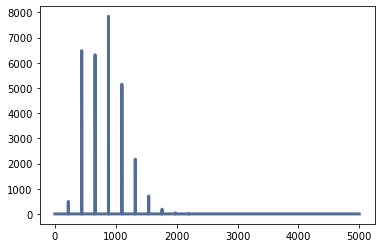

In [5]:
sp = wave1.make_spectrum()
sp.plot(high=5000)

# Finding Frequency and its amplitude in the Spectrum

In [6]:
def Freq_in_spectrum(spectrum , amps_threshold = 1):
    #input a spectrum object
    print('Frequency :')
    print(spectrum.fs[np.where(spectrum.amps > amps_threshold)])
    print('\n')
    print('Frequency amplitude:')
    print(spectrum.amps[np.where(spectrum.amps > amps_threshold)])
    print('\n')
    print('============\n')      
    return 

In here, I create a function call <code>Freq_in_spectrum</code> . It can return the peak Frequency of in the Spectrum.<br>
<br>
=============================<br>
<br>
<code>Freq_in_spectrum</code> require a spectrum object for input.


In the function,
<ul>
<li><code>amps_threshold</code> is the threshold of the Frequency amplitude. </li>
<li><code>spectrum.amps</code> is the Frequency's amplitude array of the spectrum object.</li>
<li><code>spectrum.fs</code> is the Frequency array of the spectrum object. </li>
</ul>

It select the index of <code>spectrum.amps</code> where their element's valve are larger than <code>amps_threshold</code> .<br>
Than, find out the element of <code>spectrum.fs</code> and <code>spectrum.amps</code> with above index.<br>
At last, print out the arrays.<br>
<br>





In [7]:
Freq_in_spectrum(sp,100)

Frequency :
[ 220.  440.  660.  880. 1100. 1320. 1540. 1760.]


Frequency amplitude:
[ 496.06275733 6484.12452084 6318.7702684  7850.307066   5153.25065129
 2175.35502328  712.97842444  188.21335333]





# Verification of Fig.1 

In [8]:
c = 2000
m = 200

for i in range(6):
    wave2=FM_synth_1(1,c,m,i,1)
    sp = wave2.make_spectrum()
    print('Modulation Index :', i,'\n')
    print('Amp of c:',sp.amps[np.where(sp.fs == c)],'\n')
    
    Freq_in_spectrum(sp,100)


Modulation Index : 0 

Amp of c: [5512.5] 

Frequency :
[2000.]


Frequency amplitude:
[5512.5]



Modulation Index : 1 

Amp of c: [4218.15224715] 

Frequency :
[1400. 1600. 1800. 2000. 2200. 2400. 2600.]


Frequency amplitude:
[ 107.84298883  633.40546069 2425.77885392 4218.15224715 2425.77885392
  633.40546069  107.84298883]



Modulation Index : 2 

Amp of c: [1234.19792002] 

Frequency :
[1200. 1400. 1600. 1800. 2000. 2200. 2400. 2600. 2800.]


Frequency amplitude:
[ 187.40140544  710.79966273 1944.99758274 3179.19550276 1234.19792002
 3179.19550276 1944.99758274  710.79966273  187.40140544]



Modulation Index : 3 

Amp of c: [1433.5364014] 

Frequency :
[1000. 1200. 1400. 1600. 1800. 2000. 2200. 2400. 2600. 2800. 3000.]


Frequency amplitude:
[ 237.19424566  727.83843873 1703.70825642 2679.57807398 1869.06250887
 1433.5364014  1869.06250887 2679.57807398 1703.70825643  727.83843888
  237.19424726]



Modulation Index : 4 

Amp of c: [2189.28832688] 

Frequency :
[ 800. 1000. 120

# Bessel function of the first kind of real order and complex argument.

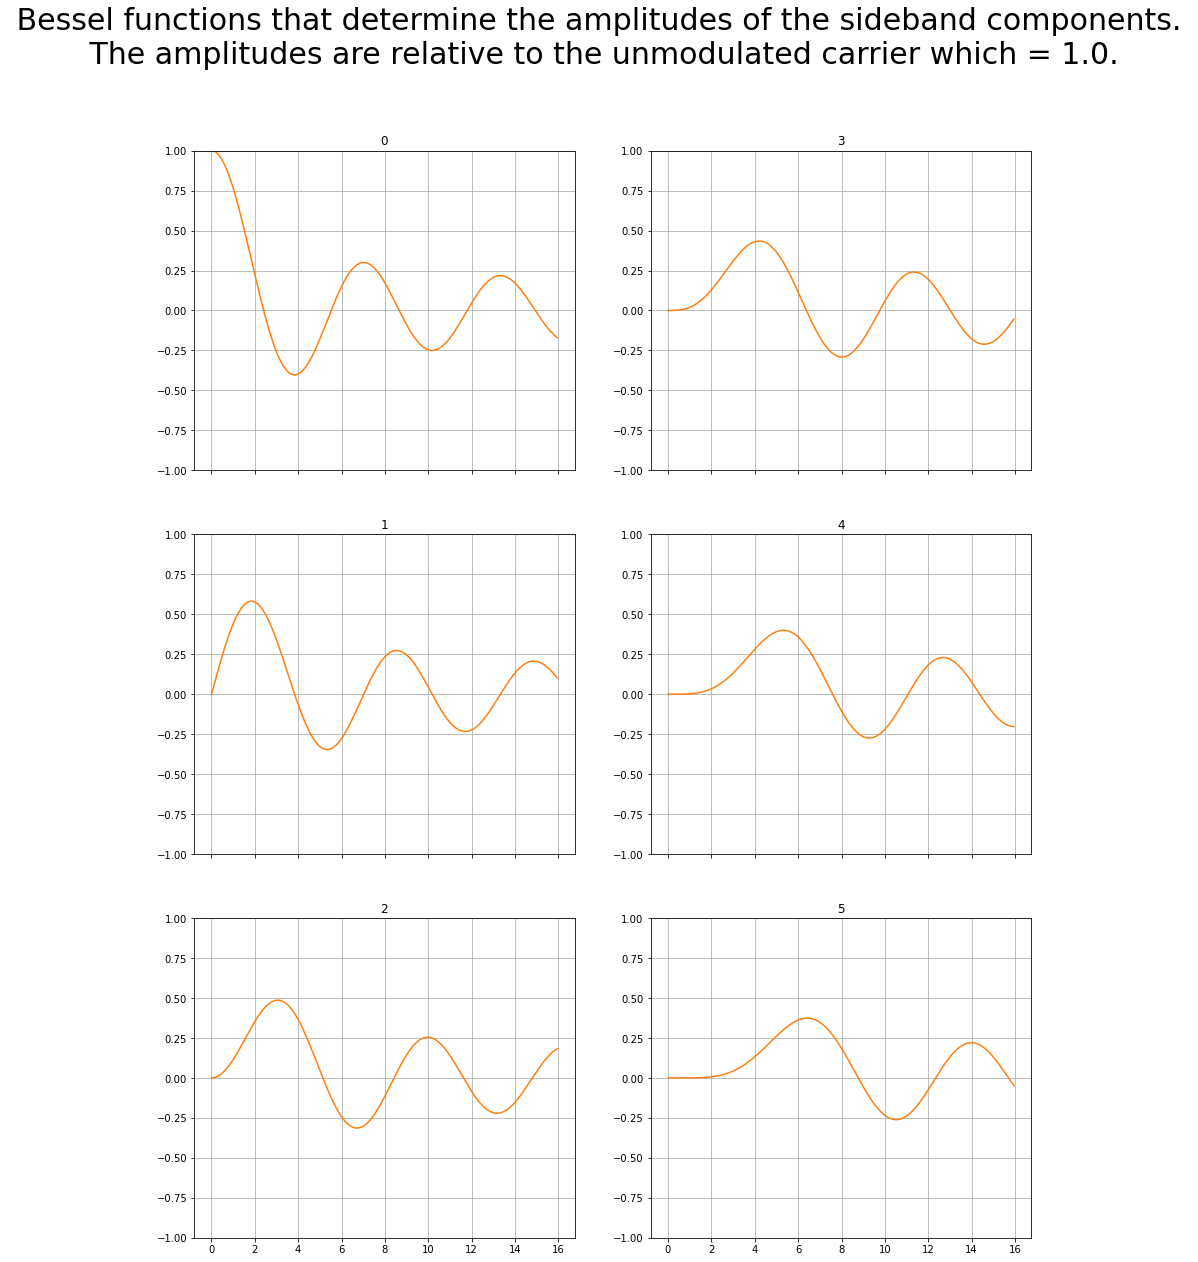

In [9]:
I = np.arange(0, 16, 0.05)

fig , axs = plt.subplots(3, 2, sharex=True)
fig.suptitle(" Bessel functions that determine the amplitudes of the sideband components. \n The amplitudes are relative to the unmodulated carrier which = 1.0.", fontsize=30)
fig.set_size_inches(15,20)



for i in range(6):
    if (i<3): 
        axs[i,0].plot(I, scipy.special.jv(i,np.arange(0, 16, 0.05)),'tab:orange')
        axs[i,0].set_title(i)
        axs[i,0].set_ylim([-1, 1])
        axs[i,0].grid(True)
    else:
        axs[i-3,1].plot(I, scipy.special.jv(i,np.arange(0, 16, 0.05)),'tab:orange')
        axs[i-3,1].set_title(i)
        axs[i-3,1].set_ylim([-1, 1])
        axs[i-3,1].grid(True)
    

## =========
# Verification of trigonometric expansion of Eq. 1


<ol>
<li>FM equation is given by:
$$e=A\sin \left[ at+I\sin \left( Bt\right) \right]$$</li>
    
<li>
    Use Trigonometric identities :

$$\sin \left( X + Y\right) = \sin \left(X\right) \cos \left(Y\right) + \cos \left(X\right) \sin \left(Y\right) $$
    </li>

<li>
    The equation now becomes:
$$ e = A\sin at \cos \left[ I\sin \left( Bt\right) \right]+ A\cos at \sin \left[ I\sin \left( Bt\right) \right] $$
Where $\cos \left[ I\sin \left( Bt\right)\right]$ and $\sin \left[ I\sin \left( Bt\right)\right] $ is a trigonometric
    series called as Bessel Function.
    </li>


<li>
    FM equation is expanded using Fourier series, thus it becomes:

$$\cos \left[ I\sin \left( Bt\right)\right] =J _0 \left(I\right) +  \sum_{n = even}^{\infty} 2J_n\left(I\right) \cos \left( nBt\right)$$
$$\sin \left[ I\sin \left( Bt\right)\right] = \sum_{n = odd}^{\infty} 2J_n\left(I\right) \sin \left( nBt\right)$$
    </li>

<li>
    Substitute in $e$ :

$$ e = A\sin\left(at\right)\left[ J _0\left(I\right) + \sum_{n = even}^{\infty} 2J_n\left(I\right) \cos \left( nBt\right)\right]+ A\cos\left(at\right) \left[\sum_{n = odd}^{\infty} 2J_n\left(I\right) \sin \left( nBt\right) \right] $$

$$ = A J _0\left(I\right)\sin\left(at\right) + A \sum_{n = even}^{\infty} 2J_n\left(I\right) \sin\left(at\right)\cos \left( nBt\right) + A \sum_{n = odd}^{\infty} 2J_n\left(I\right) \cos\left(at\right)\sin\left( nBt\right)$$
    </li>   
    
    
<li>
    Use Trigonometric identities :  
$$\sin X \cos Y = \frac{1}{2} [ \sin (X + Y) + \sin (X - Y) ]$$<br>

FM equation becomes:
$$ e = A J _0\left(I\right)\sin\left(at\right) + A \sum_{n = even}^{\infty} J_n\left(I\right) [ \sin (at + nBt) + \sin (at - nBt) ] + A \sum_{n = odd}^{\infty} J_n\left(I\right) [ \sin (nBt + at) + \sin (nBt - at) ]$$
    </li> 
    
<li>
    Use Trigonometric identities : 
$$\sin (-X) = -\sin(X)$$
    
FM equation becomes:    
$$ e = A J _0\left(I\right)\sin\left(at\right) + A \sum_{n = even}^{\infty} J_n\left(I\right) [ \sin (at + nBt) + \sin (at - nBt) ] + A \sum_{n = odd}^{\infty} J_n\left(I\right) [ \sin (at + nBt) - \sin (at - nBt) ]$$
    </li>    
    
<li>
Which is:
$$ e = A\{ J _0\left(I\right)\sin\left(at\right) \\ + J_1\left(I\right)[ \sin (a + B)t - \sin (a - B)t ] + \\ J_2\left(I\right) [ \sin (a + 2B)t + \sin (a - 2B)t] +\\ J_3\left(I\right)[ \sin (a + 3B)t - \sin (a - 3B)t ] + \ldots \\ + J_n\left(I\right) [ \sin (a + nB)t \pm \sin (a - nB)t ] + \ldots  \}$$
    </li>  
    
</ol>



# FM syth_2

In [10]:
def FM_synth_2(amplitude = 1 , carrier_freq = 1000 , modulating_freq = 100 , modulation_index = 1 , duration=1, order_of_approximation=50):

    framerate=11025

    A = amplitude #amplitude
    a = carrier_freq  #carrier frequency in Hz
    I = modulation_index   #modulation index
    B = modulating_freq  #modulating frequency in Hz

    n =  round(duration * framerate)
    ts = np.arange(n) / framerate
    
    ys = A*scipy.special.jv(0,I)*np.sin(a*2*np.pi*ts)
    for k in range(order_of_approximation):
        ys = ys + A*scipy.special.jv(k+1,I)*(np.sin((a+(k+1)*B)*2*np.pi*ts)+np.power(-1, k+1)*np.sin((a-(k+1)*B)*2*np.pi*ts))

    return thinkdsp.Wave(ys, ts, framerate = framerate)



In here, I create FM_synth_2. Its principle is base on the trigonometric expansion of Eq. 1</i>.

Which is:
$$ e = A\{ J _0\left(I\right)\sin\left(at\right) \\ + J_1\left(I\right)[ \sin (a + B)t - \sin (a - B)t ] + \\ J_2\left(I\right) [ \sin (a + 2B)t + \sin (a - 2B)t] +\\ J_3\left(I\right)[ \sin (a + 3B)t - \sin (a - 3B)t ] + \ldots \\ + J_n\left(I\right) [ \sin (a + nB)t \pm \sin (a - nB)t ] + \ldots  \}$$
=============================<br>



In my <code>FM_synth_2</code> function. it require 5 inputs:

<ul>
<li>$A$ is amplitude for signal</li>
<li>$a$ is carrier frequency in Hz</li>
<li>$I$ is modulation index</li>
<li>$B$ is modulating frequency in Hz</li>
<li><code>duration</code> is the lenth of the signal in s</li>
<li><code>order_of_approximation</code> is the order of Bessel function used for approximation. </li>   
</ul>


<ol>
<li>I set the <code>framerate</code> is $11025$.</li>
<li><code>n</code> is the number of lenth of the signal array. I let <code>n=round(duration * framerate)</code></li>
<li><code>ts</code> is an array of the times where the signal was evaluated or sampled. I let <code>ts = np.arange(n) / framerate</code>.</li>
<li><code>ys</code> is a NumPy array that contains the values in the signal. </li>
<li>Return a Wave object from Thinkdsp.<code>return thinkdsp.Wave(ys, ts, framerate = framerate)</code> </li>        
</ol>
<br>

   

# HARMONIC AND INHARMONIC SPECTRA
$$\frac{c}{m} = \frac{N_1}{N_2}$$

Frequency :
[ 500. 1000. 2000. 2500. 3500. 4000. 5000.]


Frequency amplitude:
[12654.45674145  7277.33656176  7277.33656176  1900.21638206
  1900.21638206   323.52896649   323.52896649]





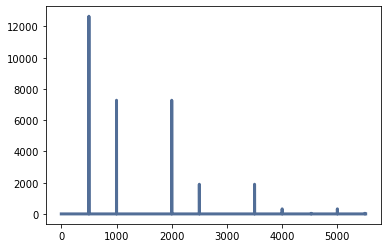

In [11]:
c=500
m=c*3
#N1=1 , N2=3


wave1=FM_synth_1(1,c,m,1,3)
sp = wave1.make_spectrum()
Freq_in_spectrum(sp,100)
sp.plot(high=6000)

Frequency :
[ 500. 1000. 1500. 2000. 2500.]


Frequency amplitude:
[ 6953.80759527 12613.49932458  7281.46693022  1899.8701143
   323.5538112 ]





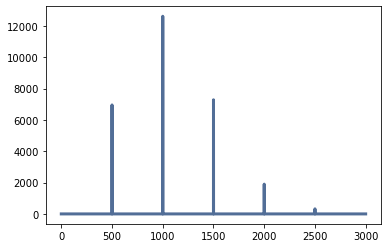

In [12]:
c=1000
m=c*0.5
#N1=2 N2=1

wave2=FM_synth_1(1,c,m,1,3)
sp = wave2.make_spectrum()
Freq_in_spectrum(sp,100)
sp.plot(high=3000)

# DYNAMIC SPECTRA

## Fig. 9. Simple FM circuit as represented in MUSIC V notation.

P4 = 1000 = amplitude of modulated carrier (arbitrary scaling)<br>
P5 = 100 Hz = carrier frequency<br>
P6 = 100 Hz = modulating frequency<br>
P7 = 400 Hz = frequency deviation, for l = 4.<br>

In [13]:
wave=FM_synth_1(1,100,100,4,3)
wave.make_audio()

Frequency :
[100. 200. 300. 400. 500. 600. 700. 800.]


Frequency amplitude:
[12589.63419265  6021.76921203  1372.59730023  9298.3438236
  3837.38613765  2435.35732245   745.16168006   266.49637635]





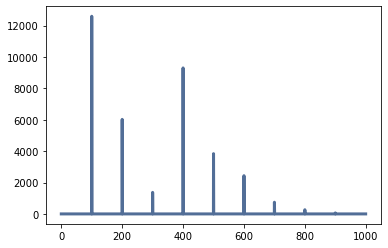

In [14]:
sp = wave.make_spectrum()
Freq_in_spectrum(sp,100)
sp.plot(high=1000)

## ============
## Fig. 10. FM circuit to produce dynamic spectra. 

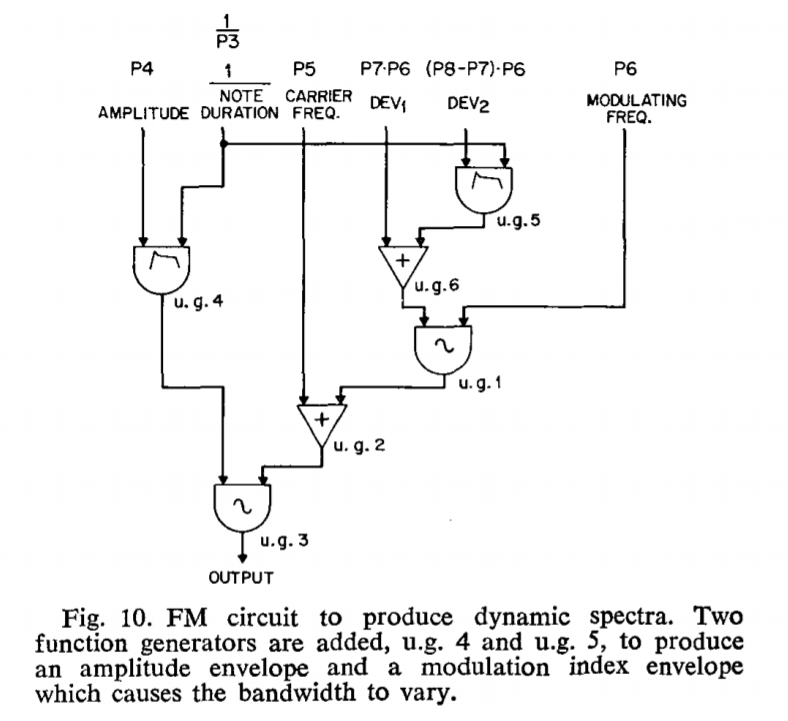

In [15]:
Image("img/fig10.PNG" ,width = 500, height = 300)

Theparameters for this instrument:</br>

P1 = Begin time of instrument</br>
P2 = Instrument number</br>
P3 = Duration of the "note"</br>
P4 = Amplitude of the output wave</br>
P5 = Carrier frequency</br>
P6 = Modulating frequency</br>
P7 = Modulation index 1,I1</br>
P8 = Modulation index 2, I2</br>

## linear ADSR envelope

In here, I create a function call <code>adsr</code> . 
It can return a linear ADSR envelope array <code>adsr_arr</code>.<br>

The formula is : <br>

For  ${0} \leq t < {a\_time}$
$${adsr\_arr} = {\frac{t}{a\_time}}$$

For  ${a\_time} \leq t < {d\_time}$
$${adsr\_arr} = \left({1-dlv}\right){\frac{\left({t-a\_time}\right)}{\left({a\_time-d\_time}\right)}}+1$$

For  ${d\_time} \leq t < {s\_time}$
$${adsr\_arr} = \left({dlv-slv}\right){\frac{\left({t-s\_time}\right)}{\left({d\_time-s\_time}\right)}}+slv$$

For  ${s\_time} \leq t < {r\_time}$
$${adsr\_arr} = \left({slv-0}\right){\frac{\left({t-r\_time}\right)}{\left({s\_time-r\_time}\right)}}+0$$

For  ${r\_time} \leq t $
$${adsr\_arr} = {0}$$

In [16]:
def adsr(a = 0.1, d = 0.2, s = 0.5, r = 0.2, dlv = 0.6, slv=0.5, duration = 1 , framerate=11025):
    #a+d+s+r<=1, dlv = DECAY Level, slv = SUSTAIN Level 

    n = round(duration * framerate)
    adsr_arr = np.full(n , 0, dtype= np.float16)
    
    a_time = np.floor(a*n).astype(int)
    d_time = np.floor(a_time+d*n).astype(int)
    s_time = np.floor(d_time+s*n).astype(int).astype(int)
    r_time = np.floor(s_time+r*n).astype(int)
    
    for i in range(a_time):
     adsr_arr[i]=((i+1)/a_time) #ATTACk
    
    for i in range(a_time, d_time):
     adsr_arr[i]=((1-dlv)*((i+1-a_time)/(a_time-d_time))+1) #DECAY
    
    for i in range(d_time, s_time):
     adsr_arr[i]=((dlv-slv)*((i+1-s_time)/(d_time-s_time))+slv)  #SUSTAIN
    
    for i in range(s_time, r_time):
     adsr_arr[i]=((slv-0)*((i+1-r_time)/(s_time-r_time))+0) #RELEASE
    
    for i in range(r_time, n):
     adsr_arr[i]=0 
    
    return adsr_arr

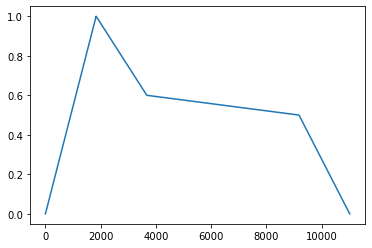

In [24]:
plt.plot(adsr(a = 1/6, d = 1/6, s = 3/6, r = 1/6, dlv = 0.6, slv=0.5, duration = 1))

## Quadratic envelope

In here, I create a function call <code>qua_envelope</code> . 
It can return a Quadratic envelope array.<br>

The formula is : <br>

For  ${0} \leq t < {a\_time}$
$${qua\_envelope\_arr} = {\frac{1}{a\_time^2}}{t^2}$$

For  ${a\_time} \leq t < {s\_time}$
$${qua\_envelope\_arr} = {1}$$

For  ${s\_time} \leq t < {r\_time}$
$${qua\_envelope\_arr} = exp({{\frac{-100{(t-{s\_time})}}{r\_time}}})$$




For  ${r\_time} \leq t $
$${qua\_envelope\_arr} = {0}$$

In [47]:
def qua_envelope(a = 0.1, s = 0.85, r=0.05, duration = 1, framerate=11025):
    #a+s<=1
    
    n = round(duration * framerate)
    qua_envelope_arr = np.full(n , 0, dtype= np.float16)
    
    a_time = np.floor(a*n).astype(int)
    s_time = np.floor(a_time+s*n).astype(int)
    r_time = np.floor(s_time+r*n).astype(int)
    
    
    for i in range(a_time):
     qua_envelope_arr[i]=(1/(a_time)**2)*(i+1)**2 ########### #ATTACk
    
    for i in range(a_time, s_time):
     qua_envelope_arr[i]=1  #SUSTAIN
    
    for i in range(s_time, r_time):
     qua_envelope_arr[i]=np.exp((-100/r_time)*(i-s_time))  #release
        
    for i in range(r_time, n):
     qua_envelope_arr[i]=0     
    
    return qua_envelope_arr

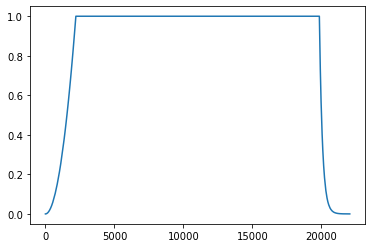

In [46]:
plt.plot(qua_envelope(a = 0.1, s = 0.8, r=0.1, duration = 2, framerate=11025))

In [25]:
np.exp(1)

2.718281828459045

# SIMULATIONS OF INSTRUMENT TONES

## Brass-like Tones

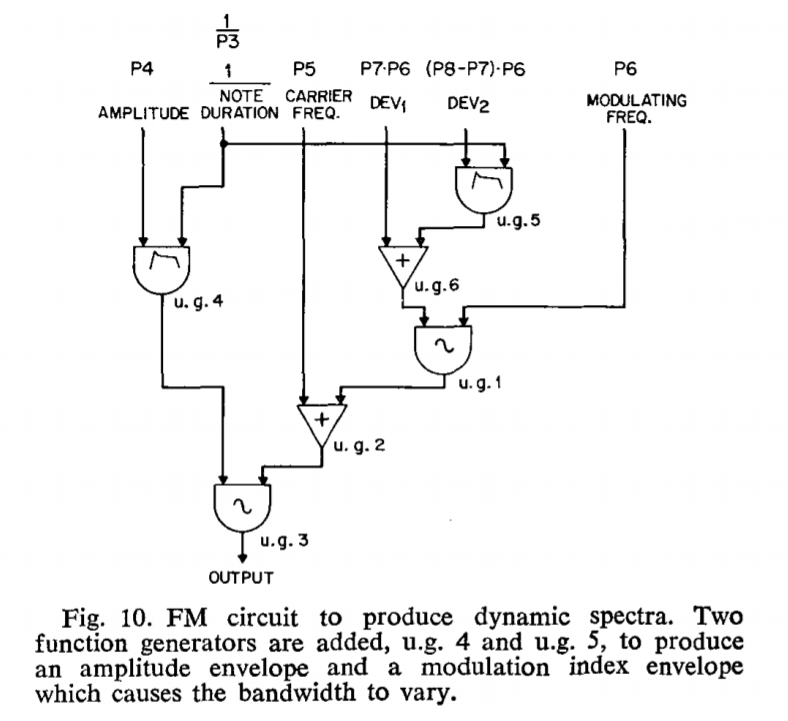

In [20]:
Image("img/fig10.PNG" ,width = 500, height = 300)

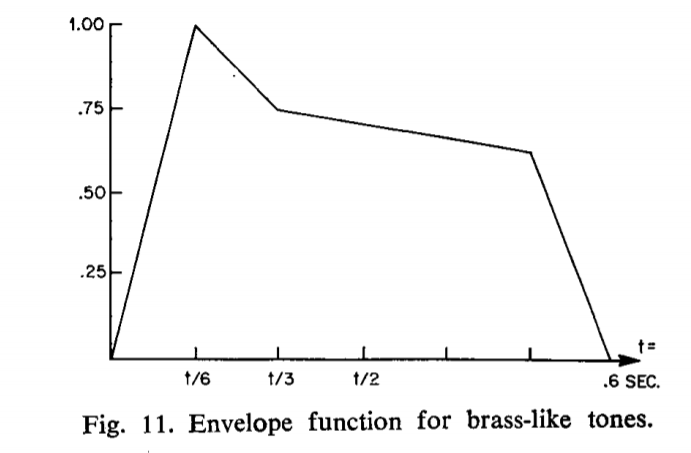

In [21]:
Image("img/fig11.PNG" ,width = 500, height = 300)

Oscillators, u.g. 4 and u.g. 5, in Fig. 10, control the amplitude and modulation index (deviation indirectly), and
both use the time domain function shown in Fig. 11

The parameter values for abrass-like tone can be:<br>

P3 = 0.6<br>
P4 = 1000 (arbitrary scaling) <br>
P5 = 440 Hz<br>
P6 = 440 Hz ( ratio of c/m = 1/1 )<br>
P7 = 0<br>
P8 = 5<br>

In [53]:
P3 = 0.6
P4 = 1000 #(arbitrary scaling)
P5 = 440
P6 = 440 
P7 = 0
P8 = 5


framerate=11025
duration=P3
n =  round(duration * framerate)
ts = np.arange(n) / framerate

ug4= adsr(a = 1/6, d = 1/6, s = 3/6, r = 1/6, dlv = 0.6, slv=0.5, duration = duration)
ug5= adsr(a = 1/6, d = 1/6, s = 3/6, r = 1/6, dlv = 0.6, slv=0.5, duration = duration)*(P8-P7)
ug6= ug5+(P7)

ys = ug4*np.sin(P5*2*np.pi*ts+ug6*np.sin(P6*2*np.pi*ts))

Brass=thinkdsp.Wave(ys, ts, framerate = framerate)

Brass.make_audio()

## Woodwind-like Tones

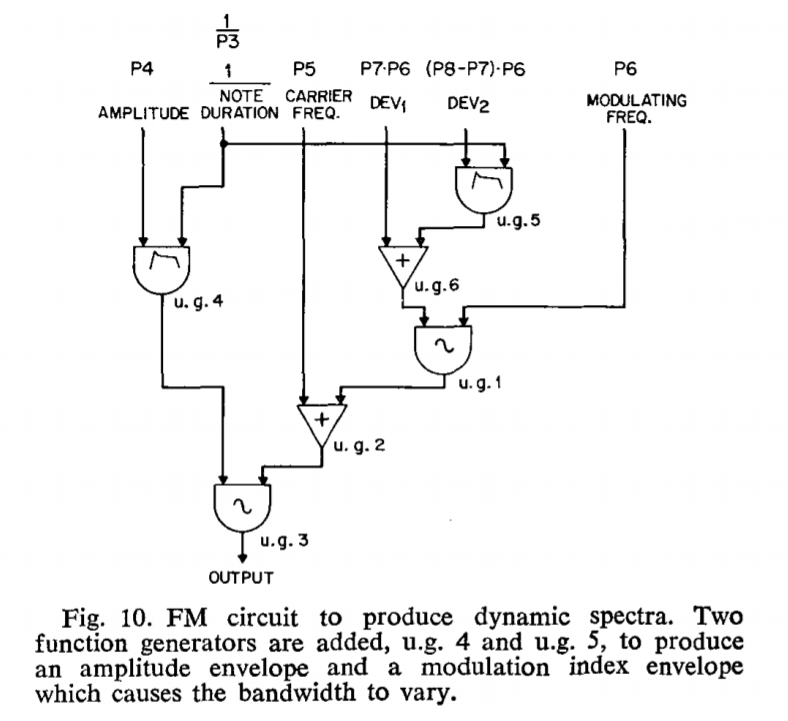

In [59]:
Image("img/fig10.PNG" ,width = 500, height = 300)

Fig. 12 is the shape of the
amplitude function, then Fig. 13 would be the shape of the index
function. 

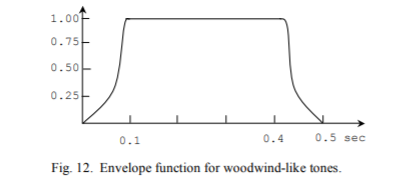

In [48]:
Image("img/fig12.PNG" ,width = 500, height = 300)

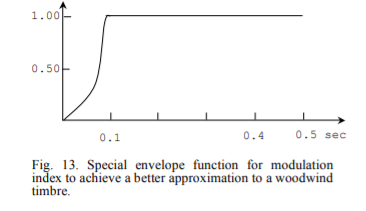

In [49]:
Image("img/fig13.PNG" ,width = 500, height = 300)

P5 = 900 Hz<br>
P6 = 300 Hz<br>
P7 = 0<br>
P8 = 2.<br>

In [52]:
P3 = 0.5
P4 = 1000 #(arbitrary scaling)
P5 = 900 
P6 = 300 
P7 = 0
P8 = 2

framerate=11025
duration=P3
n =  round(duration * framerate)
ts = np.arange(n) / framerate

ug4= qua_envelope(a = 1/5, s = 3/5, r=1/5, duration = P3, framerate=11025)
ug5= qua_envelope(a = 1/5, s = 4/5, r=0, duration = P3, framerate=11025)*(P8-P7)
ug6= ug5+(P7)

ys = ug4*np.sin(P5*2*np.pi*ts+ug6*np.sin(P6*2*np.pi*ts))

Woodwind1=thinkdsp.Wave(ys, ts, framerate = framerate)

Woodwind1.make_audio()

P5 = 500 Hz<br>
P6 = 100 Hz<br>
P7 = 0<br>
P8= 1.5.<br>

In [56]:
P3 = 0.5
P4 = 1000 #(arbitrary scaling)
P5 = 500 
P6 = 100 
P7 = 0
P8= 1.5

framerate=11025
duration=P3
n =  round(duration * framerate)
ts = np.arange(n) / framerate

ug4= qua_envelope(a = 1/5, s = 3/5, r=1/5, duration = P3, framerate=11025)
ug5= qua_envelope(a = 1/5, s = 4/5, r=0, duration = P3, framerate=11025)*(P8-P7)
ug6= ug5+(P7)

ys = ug4*np.sin(P5*2*np.pi*ts+ug6*np.sin(P6*2*np.pi*ts))

Woodwind2=thinkdsp.Wave(ys, ts, framerate = framerate)

Woodwind2.make_audio()

P5 = 900 Hz<br>
P6 = 600 Hz<br>
P7 = 4<br>
P8 = 2<br>

In [58]:
P3 = 0.5
P4 = 1000 #(arbitrary scaling)
P5 = 900 
P6 = 600 
P7 = 4
P8 = 2

framerate=11025
duration=P3
n =  round(duration * framerate)
ts = np.arange(n) / framerate

ug4= qua_envelope(a = 1/5, s = 3/5, r=1/5, duration = P3, framerate=11025)
ug5= qua_envelope(a = 1/5, s = 4/5, r=0, duration = P3, framerate=11025)*(P8-P7)
ug6= ug5+(P7)

ys = ug4*np.sin(P5*2*np.pi*ts+ug6*np.sin(P6*2*np.pi*ts))

Woodwind3=thinkdsp.Wave(ys, ts, framerate = framerate)

Woodwind3.make_audio()